In [1]:
import pandas as pd

# Load the dataset
file_path = "blogs (1).csv"
df = pd.read_csv(file_path)

# Display basic information about the dataset
df_info = df.info()
df_head = df.head()
df_description = df.describe(include='all')

df_info, df_head, df_description


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Data    2000 non-null   object
 1   Labels  2000 non-null   object
dtypes: object(2)
memory usage: 31.4+ KB


(None,
                                                 Data       Labels
 0  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...  alt.atheism
 1  Newsgroups: alt.atheism\nPath: cantaloupe.srv....  alt.atheism
 2  Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...  alt.atheism
 3  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...  alt.atheism
 4  Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...  alt.atheism,
                                                      Data       Labels
 count                                                2000         2000
 unique                                               2000           20
 top     Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...  alt.atheism
 freq                                                    1          100)

In [9]:
import string
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer


nltk.download('stopwords')

stop_words = set(stopwords.words('english'))


def preprocess_text(text):
    # Lowercase
    text = text.lower()
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Tokenize and remove stopwords
    tokens = text.split()
    filtered_tokens = [word for word in tokens if word not in stop_words]
    return " ".join(filtered_tokens)


df['Cleaned_Data'] = df['Data'].apply(preprocess_text)


df[['Data', 'Cleaned_Data']].head()


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\vogul\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Data,Cleaned_Data
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,path cantaloupesrvcscmuedumagnesiumclubcccmued...
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,newsgroups altatheism path cantaloupesrvcscmue...
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,path cantaloupesrvcscmuedudasnewsharvardedunoc...
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,path cantaloupesrvcscmuedumagnesiumclubcccmued...
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,xref cantaloupesrvcscmuedu altatheism53485 tal...


In [11]:
from sklearn.feature_extraction import text


stop_words = text.ENGLISH_STOP_WORDS

# Function to clean and preprocess text
def preprocess_text(text):
    text = text.lower()  # Lowercase
    text = text.translate(str.maketrans('', '', string.punctuation))  # Remove punctuation
    tokens = text.split()
    filtered_tokens = [word for word in tokens if word not in stop_words]  # Remove stopwords
    return " ".join(filtered_tokens)

df['Cleaned_Data'] = df['Data'].apply(preprocess_text)


df[['Data', 'Cleaned_Data']].head()


,Data,Cleaned_Data
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,path cantaloupesrvcscmuedumagnesiumclubcccmued...
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,newsgroups altatheism path cantaloupesrvcscmue...
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,path cantaloupesrvcscmuedudasnewsharvardedunoc...
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,path cantaloupesrvcscmuedumagnesiumclubcccmued...
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,xref cantaloupesrvcscmuedu altatheism53485 tal...


In [13]:
# Perform TF-IDF vectorization
vectorizer = TfidfVectorizer(max_features=5000)  # limit to 5000 features for efficiency
X_tfidf = vectorizer.fit_transform(df['Cleaned_Data'])

y = df['Labels']


X_tfidf.shape


(2000, 5000)

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Vectorize cleaned text
vectorizer = TfidfVectorizer(max_features=5000)
X_tfidf = vectorizer.fit_transform(df['Cleaned_Data'])


y = df['Labels']


print(X_tfidf.shape)  # Should output something like (2000, 5000)


(2000, 5000)


In [17]:
import pandas as pd
import string
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction import text
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder


df = pd.read_csv("blogs (1).csv")  


stop_words = text.ENGLISH_STOP_WORDS


def preprocess_text(text):
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    tokens = text.split()
    filtered = [word for word in tokens if word not in stop_words]
    return " ".join(filtered)

df['Cleaned_Data'] = df['Data'].apply(preprocess_text)

vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['Cleaned_Data'])


le = LabelEncoder()
y = le.fit_transform(df['Labels'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = MultinomialNB()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=le.classes_))


Accuracy: 0.8275

Classification Report:
                           precision    recall  f1-score   support

             alt.atheism       0.52      0.83      0.64        18
           comp.graphics       0.75      0.83      0.79        18
 comp.os.ms-windows.misc       0.86      0.82      0.84        22
comp.sys.ibm.pc.hardware       0.83      0.80      0.82        25
   comp.sys.mac.hardware       0.83      0.95      0.89        21
          comp.windows.x       0.91      0.84      0.88        25
            misc.forsale       0.82      0.78      0.80        18
               rec.autos       0.89      0.94      0.92        18
         rec.motorcycles       0.94      0.94      0.94        16
      rec.sport.baseball       0.71      0.94      0.81        18
        rec.sport.hockey       0.94      1.00      0.97        15
               sci.crypt       0.95      0.95      0.95        19
         sci.electronics       0.62      0.62      0.62        16
                 sci.med       0.

In [19]:
pip install textblob


   ---------------------------------------- 0.0/624.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/624.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/624.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/624.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/624.3 kB ? eta -:--:--
   ---------------- ----------------------- 262.1/624.3 kB ? eta -:--:--
   ---------------- ----------------------- 262.1/624.3 kB ? eta -:--:--
   ---------------- ----------------------- 262.1/624.3 kB ? eta -:--:--
   ---------------- ----------------------- 262.1/624.3 kB ? eta -:--:--
   ------------------------------- ------ 524.3/624.3 kB 294.2 kB/s eta 0:00:01
   ------------------------------- ------ 524.3/624.3 kB 294.2 kB/s eta 0:00:01
   -------------------------------------- 624.3/624.3 kB 293.5 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


<Figure size 1400x700 with 0 Axes>

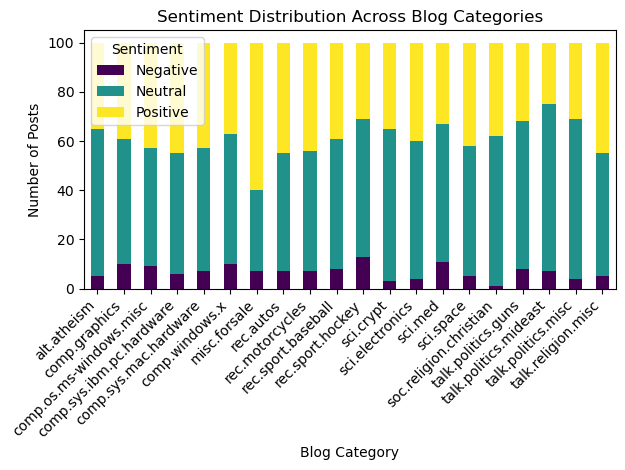

In [19]:
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv("blogs (1).csv")

def get_sentiment(text):
    polarity = TextBlob(text).sentiment.polarity
    if polarity > 0.1:
        return 'Positive'
    elif polarity < -0.1:
        return 'Negative'
    else:
        return 'Neutral'


df['Sentiment'] = df['Data'].apply(get_sentiment)


sentiment_distribution = df.groupby(['Labels', 'Sentiment']).size().unstack().fillna(0)


plt.figure(figsize=(14, 7))
sentiment_distribution.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Sentiment Distribution Across Blog Categories')
plt.xlabel('Blog Category')
plt.ylabel('Number of Posts')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [21]:
import pandas as pd
import string
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction import text
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder


df = pd.read_csv("blogs (1).csv")  # Use the correct path


stop_words = text.ENGLISH_STOP_WORDS

def preprocess_text(text):
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    tokens = text.split()
    filtered = [word for word in tokens if word not in stop_words]
    return " ".join(filtered)

df['Cleaned_Data'] = df['Data'].apply(preprocess_text)


vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['Cleaned_Data'])


le = LabelEncoder()
y = le.fit_transform(df['Labels'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = MultinomialNB()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=le.classes_))


Accuracy: 0.8275

Classification Report:
                           precision    recall  f1-score   support

             alt.atheism       0.52      0.83      0.64        18
           comp.graphics       0.75      0.83      0.79        18
 comp.os.ms-windows.misc       0.86      0.82      0.84        22
comp.sys.ibm.pc.hardware       0.83      0.80      0.82        25
   comp.sys.mac.hardware       0.83      0.95      0.89        21
          comp.windows.x       0.91      0.84      0.88        25
            misc.forsale       0.82      0.78      0.80        18
               rec.autos       0.89      0.94      0.92        18
         rec.motorcycles       0.94      0.94      0.94        16
      rec.sport.baseball       0.71      0.94      0.81        18
        rec.sport.hockey       0.94      1.00      0.97        15
               sci.crypt       0.95      0.95      0.95        19
         sci.electronics       0.62      0.62      0.62        16
                 sci.med       0.